In [1]:
#Importing packages
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Load dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170500096/170498071 [==============================] - 372s 2us/step


(50000, 32, 32, 3)

In [4]:
#See the shape
print(X_test.shape)
print(y_train.shape)

(10000, 32, 32, 3)
(50000, 1)


In [8]:
#Reshaping
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [6]:
#Define a function
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


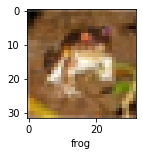

In [10]:

plot_sample(X_train, y_train, 0)

In [11]:
#Normalizing the traning data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
#Compile the model using adam optimizer
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Fit the model

cnn.fit(X_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 35s 700us/sample - loss: 1.4721 - accuracy: 0.4702- loss:
Epoch 2/10
50000/50000 [==============================] - 32s 644us/sample - loss: 1.1171 - accuracy: 0.6084
Epoch 3/10
50000/50000 [==============================] - 32s 642us/sample - loss: 1.0012 - accuracy: 0.6514
Epoch 4/10
50000/50000 [==============================] - 32s 643us/sample - loss: 0.9250 - accuracy: 0.6782
Epoch 5/10
50000/50000 [==============================] - 32s 643us/sample - loss: 0.8664 - accuracy: 0.6987
Epoch 6/10
50000/50000 [==============================] - 32s 643us/sample - loss: 0.8191 - accuracy: 0.7170
Epoch 7/10
50000/50000 [==============================] - 32s 644us/sample - loss: 0.7705 - accuracy: 0.7309
Epoch 8/10
50000/50000 [==============================] - 32s 645us/sample - loss: 0.7325 - accuracy: 0.7448
Epoch 9/10
50000/50000 [==============================] - 32s 644us/sample - loss: 0.6906 - accura

In [16]:
#Evaluating the model
cnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 4s 354us/sample - loss: 0.9183 - accuracy: 0.6952


[0.9183346002578735, 0.6952]

In [17]:
#Making prediction
y_pred = cnn.predict(X_test)

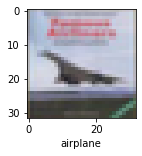

In [18]:
plot_sample(X_test, y_test,3)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
classes[y_classes[3]]

'airplane'